In [1]:
# 1. Change working dictionary
import os
os.chdir("../..")
os.getcwd() # current working dictionary

'/home/rzh/PycharmProjects/spatial'

In [2]:
# 2. Check Your Environment
from utils.check import *
print("Checking requirements...")
Check_Environments()
Check_Requirements({"anndata", "h5py","matplotlib", "numpy","collection", "pandas", "scanpy", "scipy", "torch", "rtree", "geopandas", "esda"})
print("Importing requirements...")
import json
import shutil
from utils.io import *
from utils.api import Despot_Run
print("All requirements imported.")

Checking requirements...
Checking Python environments...
Python path: /home/rzh/anaconda3/envs/spatial/bin/python
Python version: 3.9.7 (default, Sep 16 2021, 13:09:58) 
[GCC 7.5.0]
Python venv: /home/rzh/anaconda3/envs/spatial
Working Dictionary: /home/rzh/PycharmProjects/spatial/utils
Checking R environments...
R version 4.1.3 (2022-03-10) -- "One Push-Up"
Copyright (C) 2022 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under the terms of the
GNU General Public License versions 2 or 3.
For more information about these matters see
https://www.gnu.org/licenses/.

Checking basical requirements...
All requirements satisfied.
Importing requirements...
All requirements imported.


In [3]:
# 3. Load the configs of PDAC-A and set python,R,venv path
cfg = Load_json_configs("configs/PDAC-A.json")
# set python path
pythonPath = sys.executable
cfg["pythonPath"] = pythonPath
# set R lib path
cfg["R_library_Path"] = 'sptranr/R'
# set working dictionary
cfg["working_dir"] = os.getcwd()
# set venv
cfg["venv"] = sys.prefix.split('/')[-1]
cfg

{'dataPath': 'expr/PDAC',
 'platform': 'ST',
 'dataName': 'PDAC-A-ST1-filtered.txt.gz',
 'imgPath': 'expr/PDAC',
 'imgName': 'PDAC-A-ST1-HE.jpg',
 'dataSpices': 'Human',
 'name': 'PDAC-A',
 'filter_matrix': True,
 'smdFile': 'expr/PDAC/PDAC-A.h5smd',
 'ground_truth': 'metadata.csv',
 'ground_name': '',
 'scDataPath': 'expr/PDAC',
 'scType': 'txt',
 'scBarcodes': '',
 'scFeatures': '',
 'scMatrix': 'PDAC-A-indrop-filtered-expMat.txt.gz',
 'scGroundTruth': 'PDAC-A-indrop-annotation.tsv',
 'scGroundName': 'free_annotation',
 'load_hires': False,
 'load_fullres': False,
 'fullres_path': '',
 'Decontamination': ['none', 'SPCS', 'SpotClean', 'SPROD'],
 'Clustering': ['Seurat',
  'Giotto',
  'BayesSpace',
  'SpaGCN',
  'leiden',
  'stlearn',
  'SEDR'],
 'Deconvolution': ['CARD',
  'Seurat',
  'Giotto',
  'Cell2Location',
  'SPOTlight',
  'SPOTlight_es',
  'SPOTlight_vae',
  'spacexr',
  'spacexr_es',
  'StereoScope',
  'StereoScope_na',
  'StereoScope_es'],
 'pythonPath': '/home/rzh/anaconda3

In [ ]:
# 4. Run Despot (Outputs are trancated)
smd = Despot_Run(cfg)

In [6]:
smd = smdInfo(cfg["smdFile"])

In [7]:
smd.get_cell_types()

array(['Acinar cells', 'Cancer clone A', 'Cancer clone B',
       'Ductal - APOL1 high/hypoxic',
       'Ductal - CRISP3 high/centroacinar like', 'Ductal - MHC Class II',
       'Ductal - terminal ductal like', 'Endocrine cells',
       'Endothelial cells', 'Fibroblasts', 'Macrophages A',
       'Macrophages B', 'Mast cells', 'Monocytes', 'RBCs',
       'T cells & NK cells', 'Tuft cells', 'mDCs A', 'mDCs B', 'pDCs'],
      dtype='<U38')

=========3DLandscape Plotting==========
smdFile: expr/PDAC/PDAC-A.h5smd
Platform: ST
Image Path: expr/PDAC/PDAC-A-ST1-HE.jpg
Full Cell Types: ['Acinar cells', 'Cancer clone A', 'Cancer clone B', 'Ductal - APOL1 high/hypoxic', 'Ductal - CRISP3 high/centroacinar like', 'Ductal - MHC Class II', 'Ductal - terminal ductal like', 'Endocrine cells', 'Endothelial cells', 'Fibroblasts', 'Macrophages A', 'Macrophages B', 'Mast cells', 'Monocytes', 'RBCs', 'T cells & NK cells', 'Tuft cells', 'mDCs A', 'mDCs B', 'pDCs']
Cell Types: ['Acinar cells', 'Cancer clone A', 'Cancer clone B', 'Ductal - CRISP3 high/centroacinar like', 'Fibroblasts']
Mapping cell-type-specific domains...
Arranging cell-type-specific domains...
Plotting domain edges and scatters...
Plotting surfaces using ST...
=========3DLandscape Finished==========


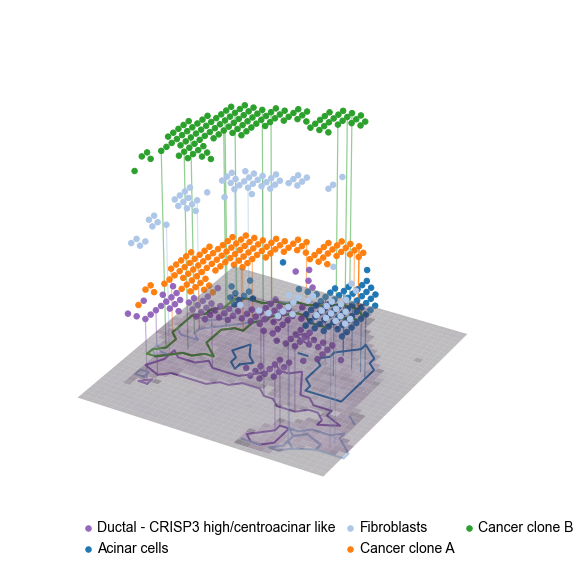

In [8]:
# 5. Show 3DLandscape of High-proportion cell-type-specific domains
from utils.geo import Show_3D_landscape
img = f"{cfg['imgPath']}/{cfg['imgName']}"
spot3Ds = Show_3D_landscape(cfg["smdFile"], imgPath = img, alpha=20,save=False,
                            cell_types=['Acinar cells', 'Cancer clone A', 'Cancer clone B',
                                  'Ductal - CRISP3 high/centroacinar like', 'Fibroblasts'])

=========3DLandscape Plotting==========
smdFile: expr/PDAC/PDAC-A.h5smd
Platform: ST
Image Path: expr/PDAC/PDAC-A-ST1-HE.jpg
Full Cell Types: ['Acinar cells', 'Cancer clone A', 'Cancer clone B', 'Ductal - APOL1 high/hypoxic', 'Ductal - CRISP3 high/centroacinar like', 'Ductal - MHC Class II', 'Ductal - terminal ductal like', 'Endocrine cells', 'Endothelial cells', 'Fibroblasts', 'Macrophages A', 'Macrophages B', 'Mast cells', 'Monocytes', 'RBCs', 'T cells & NK cells', 'Tuft cells', 'mDCs A', 'mDCs B', 'pDCs']
Cell Types: ['Fibroblasts', 'Macrophages B', 'Mast cells', 'Monocytes', 'T cells & NK cells', 'mDCs B']
Mapping cell-type-specific domains...
Arranging cell-type-specific domains...
Plotting domain edges and scatters...
Plotting surfaces using ST...
=========3DLandscape Finished==========


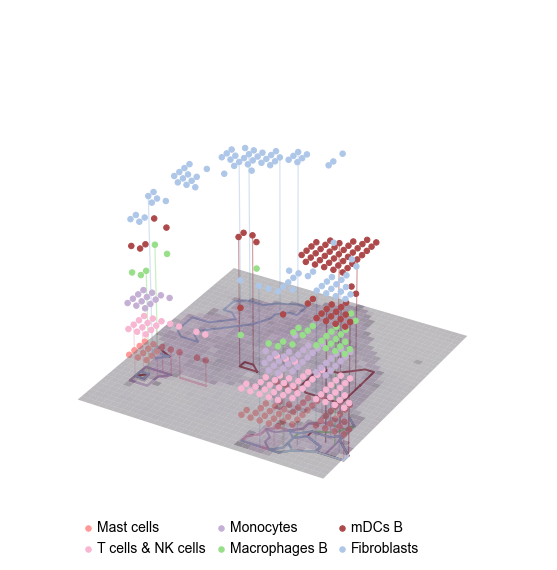

In [9]:
# 6. Show 3DLandscape of Immune-related cell-type-specific domains
from utils.geo import Show_3D_landscape
img = f"{cfg['imgPath']}/{cfg['imgName']}"
spot3Ds = Show_3D_landscape(cfg["smdFile"], imgPath = img, alpha=20,save=False,
                            cell_types=['Mast cells', 'Monocytes', 'mDCs B',
                                  'T cells & NK cells', 'Macrophages B', 'Fibroblasts'])